In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")


In [99]:
def linear_hypothesis(X, theta):
    """
    Розраховує гіпотезу лінійної регресії у векторному вигляді.

    Параметри:
    X (ndarray): Матриця ознак розмірністю (m, n), де m - кількість прикладів, n - кількість ознак.
    theta (ndarray): Вектор параметрів розмірністю (n, 1).

    Повертає:
    ndarray: Вектор гіпотези розмірністю (m, 1).
    """
    return X.dot(theta)

In [100]:
def compute_cost(X, y, theta):
    """
    Обчислює функцію втрат для лінійної регресії.

    Параметри:
    X (ndarray): Матриця ознак розмірністю (m, n).
    y (ndarray): Вектор цільових значень розмірністю (m, 1).
    theta (ndarray): Вектор параметрів розмірністю (n, 1).

    Повертає:
    float: Значення функції втрат.
    """
    m = len(y)
    predictions = linear_hypothesis(X, theta)
    squared_errors = (predictions - y) ** 2
    cost = 1 / (2 * m) * np.sum(squared_errors)
    return cost

In [101]:
def gradient_descent_step(X, y, theta, learning_rate):
    """
    Виконує один крок градієнтного спуску для лінійної регресії.

    Параметри:
    X (ndarray): Матриця ознак розмірністю (m, n).
    y (ndarray): Вектор цільових значень розмірністю (m, 1).
    theta (ndarray): Вектор параметрів розмірністю (n, 1).
    learning_rate (float): Швидкість навчання (learning rate).

    Повертає:
    ndarray: Оновлений вектор параметрів theta після одного кроку градієнтного спуску.
    """
    m = len(y)
    predictions = linear_hypothesis(X, theta)
    gradient = (1 / m) * X.T.dot(predictions - y)
    theta -= learning_rate * gradient
    return theta

In [102]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    """
    Виконує градієнтний спуск для лінійної регресії.

    Параметри:
    X (ndarray): Матриця ознак розмірністю (m, n).
    y (ndarray): Вектор цільових значень розмірністю (m, 1).
    theta (ndarray): Початковий вектор параметрів розмірністю (n, 1).
    learning_rate (float): Швидкість навчання (learning rate).
    num_iterations (int): Кількість ітерацій градієнтного спуску.

    Повертає:
    ndarray: Оновлений вектор параметрів theta після градієнтного спуску.
    """
    for i in range(num_iterations):
        theta = gradient_descent_step(X, y, theta, learning_rate)
    return theta

In [103]:
def analytical_solution(X, y):
    """
    Знаходить параметри лінійної регресії за допомогою аналітичного рішення.

    Параметри:
    X (ndarray): Матриця ознак розмірністю (m, n).
    y (ndarray): Вектор цільових значень розмірністю (m, 1).

    Повертає:
    ndarray: Вектор параметрів theta, знайдений аналітичним шляхом.
    """
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

Параметри за допомогою градієнтного спуску:
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]

Параметри за допомогою аналітичного рішення:
[[-3.24509050e+05]
 [ 2.43906887e+02]
 [ 1.19474386e+05]
 [ 9.88888287e+05]
 [ 4.50391518e+05]
 [ 4.23100741e+05]
 [ 2.98030507e+05]
 [ 3.57926360e+05]
 [ 8.72936027e+05]
 [ 8.53633595e+05]
 [ 2.79785637e+05]
 [ 6.47055599e+05]
 [ 4.26375563e+05]]


C:\Users\prime\AppData\Local\Temp\ipykernel_20344\1281911864.py:17: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


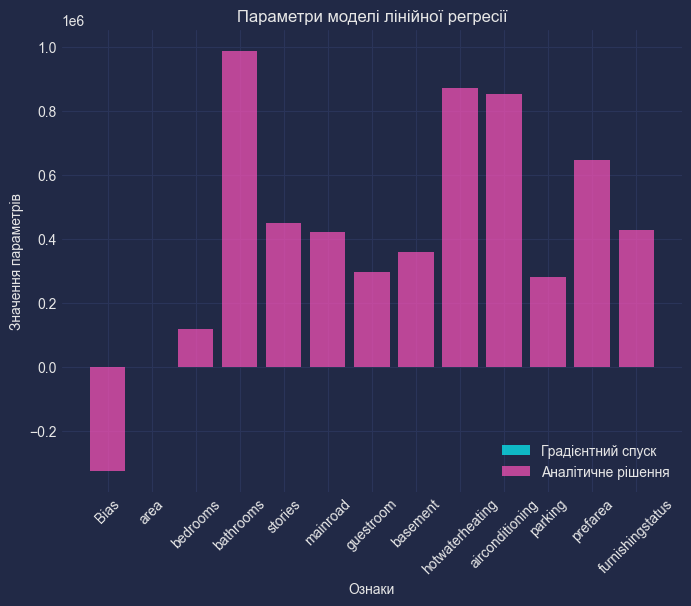

In [104]:
# Завантаження даних з файлу Housing.csv
data = pd.read_csv("Housing.csv")

# Опрацьовуємо бінарні ознаки (замінюємо "yes" на 1 і "no" на 0)
binary_features = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
for feature in binary_features:
    data[feature] = data[feature].apply(lambda x: 1 if x == "yes" else 0)

# Опрацьовуємо ознаку "furnishingstatus" за допомогою кодування з однією гарячою категорією
furnishing_mapping = {"furnished": 1, "semi-furnished": 0.5, "unfurnished": 0}
data["furnishingstatus"] = data["furnishingstatus"].map(furnishing_mapping)

# Вибираємо колонки для матриці ознак X і вектора цільових значень y
X = data[["area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement",
          "hotwaterheating", "airconditioning", "parking", "prefarea", "furnishingstatus"]].values
y = data["price"].values.reshape(-1, 1)

# Додамо стовпець одиниць до матриці ознак X для врахування зсуву (bias).
X = np.c_[np.ones((X.shape[0], 1)), X]

# Параметри моделі
learning_rate = 0.01  # Зменшено значення learning_rate
num_iterations = 1500

# Початковий вектор параметрів theta
theta_initial = np.zeros((X.shape[1], 1))

# Знаходимо параметри за допомогою градієнтного спуску
theta_gradient_descent = gradient_descent(X, y, theta_initial, learning_rate, num_iterations)

# Знаходимо параметри за допомогою аналітичного рішення
theta_analytical = analytical_solution(X, y)

# Виводимо результати
print("Параметри за допомогою градієнтного спуску:")
print(theta_gradient_descent)

print("\nПараметри за допомогою аналітичного рішення:")
print(theta_analytical)

# Створення графіка
plt.figure(figsize=(8, 6))
plt.bar(range(len(theta_gradient_descent)), theta_gradient_descent[:, 0], label='Градієнтний спуск', alpha=0.7)
plt.bar(range(len(theta_analytical)), theta_analytical[:, 0], label='Аналітичне рішення', alpha=0.7)
plt.xlabel('Ознаки')
plt.ylabel('Значення параметрів')
plt.title('Параметри моделі лінійної регресії')
plt.xticks(range(len(theta_gradient_descent)), ["Bias", "area", "bedrooms", "bathrooms", "stories", "mainroad",
                                                "guestroom", "basement", "hotwaterheating", "airconditioning",
                                                "parking", "prefarea", "furnishingstatus"], rotation=45)
plt.legend()
mplcyberpunk.add_glow_effects()
plt.show()